### Initiale Untersuchungen zu den abgewiesenen Fällen für beide Logs

In [2]:
import pm4py
from src.loader import load_data

log_domestic = load_data('domestic')
log_international = load_data('international')

parsing log, completed traces ::   0%|          | 0/10500 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/6449 [00:00<?, ?it/s]

In [3]:
endactivities_log_domestic = pm4py.get_end_activities(log_domestic)
print(f'Es gibt im Domestic-Datensatz {len(endactivities_log_domestic)} unterschiedliche Endaktivitäten.')
endactivities_log_domestic

unique_case_ids_domestic = log_domestic['case:id'].unique()
print(f'Es existieren insgesamt {len(unique_case_ids_domestic)} Traces im zugehörigen log_domestic.')

Es gibt im Domestic-Datensatz 6 unterschiedliche Endaktivitäten.
Es existieren insgesamt 10500 Traces im zugehörigen log_domestic.


In [4]:
from pm4py.statistics.end_activities.log import get as end_activities_get

# Get end activities and their frequencies
end_activities_freq_domestic = end_activities_get.get_end_activities(log_domestic)


print('Die Endaktivitäten des Domestic-Logs und ihre absoluten Häufigkeiten sind nachfolgend aufgeführt:\n')

# Display the results
for activity, frequency in end_activities_freq_domestic.items():
    print(f"Activity: {activity}, Frequency: {frequency}")

Die Endaktivitäten des Domestic-Logs und ihre absoluten Häufigkeiten sind nachfolgend aufgeführt:

Activity: Payment Handled, Frequency: 10043
Activity: Declaration SAVED by EMPLOYEE, Frequency: 134
Activity: Declaration REJECTED by MISSING, Frequency: 30
Activity: Declaration REJECTED by EMPLOYEE, Frequency: 284
Activity: Declaration REJECTED by ADMINISTRATION, Frequency: 5
Activity: Declaration REJECTED by SUPERVISOR, Frequency: 4


In [5]:
import pm4py
from pm4py.algo.filtering.log.end_activities import end_activities_filter

# Einschränkung der Auswahl an Endereignissen aus dem log_domestic auf 'rejected-Fälle':
target_end_activities_domestic = [
    # Payment Handled
    #'Declaration SAVED by EMPLOYEE',
    'Declaration REJECTED by MISSING',
    'Declaration REJECTED by EMPLOYEE',
    'Declaration REJECTED by ADMINISTRATION',
    'Declaration REJECTED by SUPERVISOR'
]

# Filtere das Log basierend auf den Endereignissen
filtered_log_rejected_domestic = end_activities_filter.apply(log_domestic, target_end_activities_domestic)

# Überprüfe die Anzahl der verbleibenden Fälle
print(f'Anzahl der abgewiesenen Fälle bei inländischen Reiseanträgen beträgt: {len(filtered_log_rejected_domestic)} von insgesamt {len(unique_case_ids_domestic)}. '
      f'Das entspricht etwa '
      f'{len(filtered_log_rejected_domestic) / len(unique_case_ids_domestic):.2%}')

# Das gefilterte Log speichern
# pm4py.write_xes(filtered_log_rejected_domestic, 'RejectedDomesticDeclarations.xes')



Anzahl der abgewiesenen Fälle bei inländischen Reiseanträgen beträgt: 323 von insgesamt 10500. Das entspricht etwa 3.08%


In [6]:
endactivities_log_international = pm4py.get_end_activities(log_international)
print(f'Es gibt im Interantional-Datensatz {len(endactivities_log_international)} unterschiedliche Endaktivitäten.')
endactivities_log_international

unique_case_ids_international = log_international['case:id'].unique()
print(f'Es existieren insgesamt {len(unique_case_ids_international)} Traces im log_domestic.')

Es gibt im Interantional-Datensatz 10 unterschiedliche Endaktivitäten.
Es existieren insgesamt 6449 Traces im log_domestic.


In [7]:
from pm4py.statistics.end_activities.log import get as end_activities_get

# Get end activities and their frequencies
end_activities_freq_international = end_activities_get.get_end_activities(log_international)


print('Die Endaktivitäten des Domestic-Logs und ihre absoluten Häufigkeiten sind nachfolgend aufgeführt:\n')
# Display the results
for activity, frequency in end_activities_freq_international.items():
    print(f"Activity: {activity}, Frequency: {frequency}")

Die Endaktivitäten des Domestic-Logs und ihre absoluten Häufigkeiten sind nachfolgend aufgeführt:

Activity: Payment Handled, Frequency: 5646
Activity: End trip, Frequency: 593
Activity: Declaration SAVED by EMPLOYEE, Frequency: 54
Activity: Permit REJECTED by MISSING, Frequency: 8
Activity: Declaration REJECTED by MISSING, Frequency: 11
Activity: Declaration REJECTED by EMPLOYEE, Frequency: 130
Activity: Declaration FINAL_APPROVED by SUPERVISOR, Frequency: 1
Activity: Send Reminder, Frequency: 2
Activity: Request Payment, Frequency: 3
Activity: Declaration REJECTED by SUPERVISOR, Frequency: 1


In [8]:
print('Die Endaktivitäten des internationalen Datensätze werden nur auf die abgewiesenen Fälle eingeschränkt.')
target_end_activities_international = [
 # 'Payment Handled',
 # 'End trip',
 # 'Declaration SAVED by EMPLOYEE',
 'Permit REJECTED by MISSING',
 'Declaration REJECTED by MISSING',
 'Declaration REJECTED by EMPLOYEE',
 # 'Declaration FINAL_APPROVED by SUPERVISOR',
 # 'Send Reminder',
 # 'Request Payment',
 'Declaration REJECTED by SUPERVISOR'
]

Die Endaktivitäten des internationalen Datensätze werden nur auf die abgewiesenen Fälle eingeschränkt.


In [9]:
import pm4py
from pm4py.algo.filtering.log.end_activities import end_activities_filter

# Filtere das Log basierend auf den Endereignissen
filtered_log_rejected_domestic = end_activities_filter.apply(log_domestic, target_end_activities_domestic)

# Filtere das Log basierend auf den Endereignissen
filtered_log_rejected_international = end_activities_filter.apply(log_international, target_end_activities_international)

print(f'Anzahl der abgewiesenen Fälle bei internationalen Reiseanträgen beträgt: {len(filtered_log_rejected_international)} von insgesamt {len(unique_case_ids_international)}. '
      f'Das entspricht etwa '
      f'{len(filtered_log_rejected_international) / len(unique_case_ids_international):.2%}')

# Optional: Das gefilterte Log speichern
# pm4py.write_xes(filtered_log_rejected_international, 'RejectedInternationalDeclarations.xes')

Anzahl der abgewiesenen Fälle bei internationalen Reiseanträgen beträgt: 150 von insgesamt 6449. Das entspricht etwa 2.33%


-----------

### Darstellung der Unterschiede

In [10]:
import pm4py
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to calculate case durations and prepare data
def prepare_data(log, log_type):
    end_activities = []
    case_durations = []
    for trace in log:
        # Get the end activity (last event's activity name)
        end_activity = trace[-1]['concept:name']
        end_activities.append(end_activity)

        # Calculate the duration as the time difference between the first and last event in the trace
        duration = ((trace[-1]['time:timestamp'] - trace[0]['time:timestamp']).total_seconds()/60/60)
        case_durations.append(duration)
    
    # Create a DataFrame to map end activities to their respective durations and add log type
    data = {'End Activity': end_activities, 'Duration': case_durations, 'Log Type': log_type}
    return pd.DataFrame(data)

# Prepare data for both logs
df_domestic = prepare_data(filtered_log_rejected_domestic, 'Domestic')
df_international = prepare_data(filtered_log_rejected_international, 'International')

# Combine both dataframes
df_combined = pd.concat([df_domestic, df_international])


In [11]:
print(len(log_domestic))
print(len(log_international))
print(len(filtered_log_rejected_domestic))
print(len(filtered_log_rejected_international))

56437
72151
323
150


In [12]:
import pandas as pd
from IPython.display import Markdown, display

pivot_table = df_combined.pivot_table(
    index='End Activity',  # Rows
    columns='Log Type',    # Columns
    values='Duration',     # Values to aggregate
    aggfunc=[ 'count', 'mean', 'std'] # Aggregation functions (mean, std, count)
)

# Reset the index for easier manipulation
pivot_table_reset = pivot_table.reset_index()

# Flatten the MultiIndex columns (if present)
pivot_table_reset.columns = [' '.join(col).strip() for col in pivot_table_reset.columns.values]

# Convert to Markdown table
markdown_table = pivot_table_reset.to_markdown(index=False)

# Display the Markdown table
display(Markdown(markdown_table))


| End Activity                           |   count Domestic |   count International |   mean Domestic |   mean International |   std Domestic |   std International |
|:---------------------------------------|-----------------:|----------------------:|----------------:|---------------------:|---------------:|--------------------:|
| Declaration REJECTED by ADMINISTRATION |                5 |                   nan |        3834.96  |              nan     |       4344.56  |             nan     |
| Declaration REJECTED by EMPLOYEE       |              284 |                   130 |         261.084 |             1734.76  |        738.262 |            1227.68  |
| Declaration REJECTED by MISSING        |               30 |                    11 |         336.728 |             1675.3   |        654.374 |             995.321 |
| Declaration REJECTED by SUPERVISOR     |                4 |                     1 |         156.207 |              599.161 |        188.919 |             nan     |
| Permit REJECTED by MISSING             |              nan |                     8 |         nan     |             2451.41  |        nan     |             527.477 |

In [19]:
import seaborn as sns

sns.set_theme(
    palette="viridis",
    style="whitegrid"
)

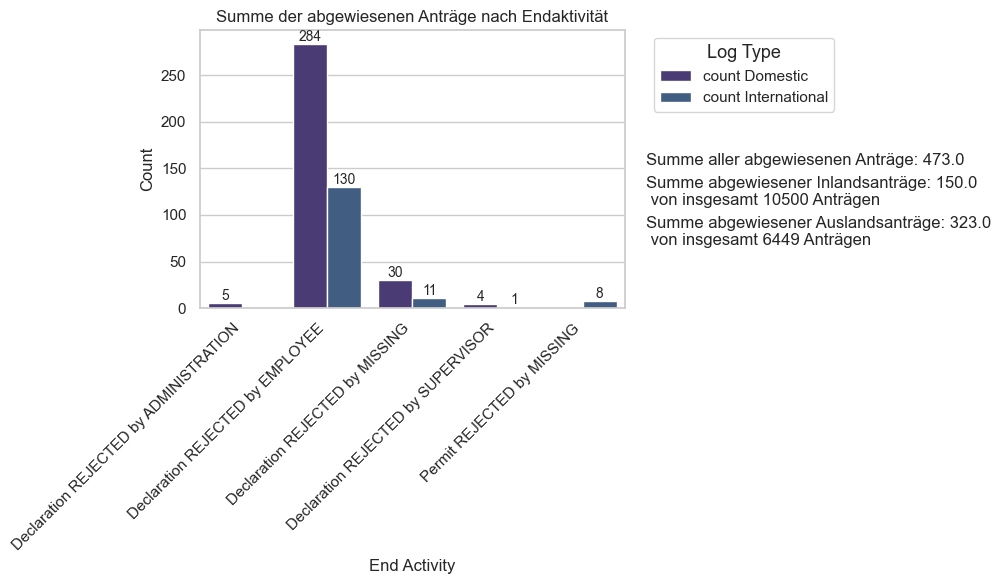

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Melt the pivot table to long-form for seaborn
pivot_table_long = pivot_table_reset.melt(id_vars='End Activity', value_vars=count_columns, var_name='Log Type', value_name='Count')

# Plotting with Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=pivot_table_long, 
    x='End Activity', 
    y='Count', 
    hue='Log Type'
)

# Customize the plot
plt.title('Summe der abgewiesenen Anträge nach Endaktivität')
plt.xlabel('End Activity')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Annotate each bar with its height (the count value)
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10)

# Calculate the sum of all counts
total_count = pivot_table_long['Count'].sum()

# Calculate the sum of rejected domestic and foreign applications
sum_inlandsanträge = pivot_table_long[pivot_table_long['Log Type'].str.contains('International')]['Count'].sum()
sum_auslandsanträge = pivot_table_long[pivot_table_long['Log Type'].str.contains('Domestic')]['Count'].sum()

# Display the sum of counts under the legend
plt.legend(
    title='Log Type', 
    bbox_to_anchor=(1.05, 1), 
    loc='upper left', 
    title_fontsize='13', 
    fontsize='11'
)
# Add the sum of all, domestic, and foreign rejected applications
plt.text(1.05, 0.5, f'Summe aller abgewiesenen Anträge: {total_count}\n', transform=ax.transAxes, fontsize=12, verticalalignment='center')
plt.text(1.05, 0.45, f'\nSumme abgewiesener Inlandsanträge: {sum_inlandsanträge}\n von insgesamt {len(unique_case_ids_domestic)} Anträgen', transform=ax.transAxes, fontsize=12, verticalalignment='center')
plt.text(1.05, 0.40, f'\n\n\n\nSumme abgewiesener Auslandsanträge: {sum_auslandsanträge}\n von insgesamt {len(unique_case_ids_international)} Anträgen', transform=ax.transAxes, fontsize=12, verticalalignment='center')

plt.tight_layout()

# Show the plot
plt.show()


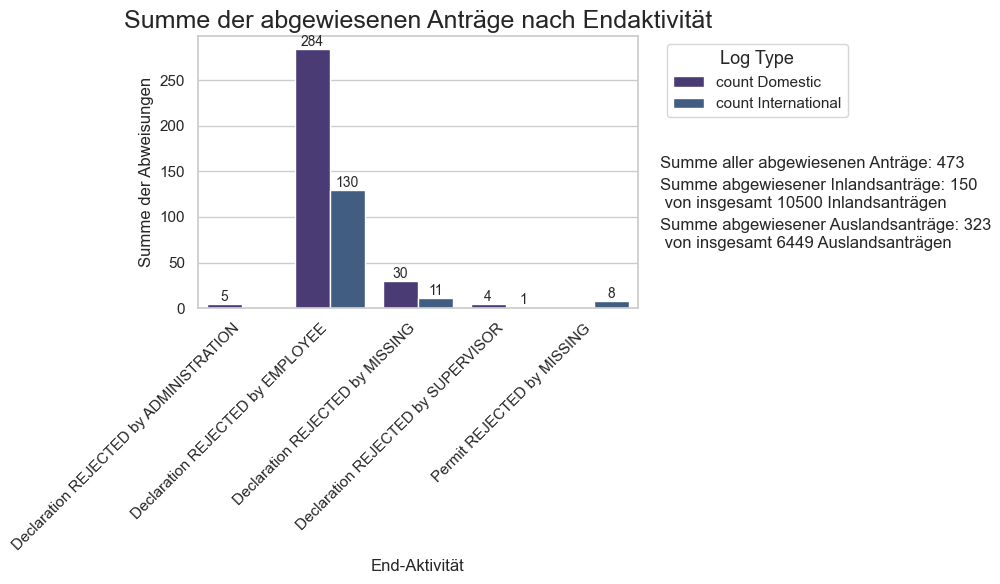

<Figure size 2000x1000 with 0 Axes>

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Melt the pivot table to long-form for seaborn
pivot_table_long = pivot_table_reset.melt(id_vars='End Activity', value_vars=count_columns, var_name='Log Type', value_name='Count')

# Plotting with Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=pivot_table_long, 
    x='End Activity', 
    y='Count', 
    hue='Log Type'
)

# Customize the plot
plt.title('Summe der abgewiesenen Anträge nach Endaktivität', fontsize=18)
plt.xlabel('End-Aktivität')
plt.ylabel('Summe der Abweisungen')
plt.xticks(rotation=45, ha='right')

# Annotate each bar with its height (the count value)
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10)

# Calculate the sum of all counts
total_count = int(pivot_table_long['Count'].sum())

# Calculate the sum of rejected domestic and foreign applications
sum_inlandsanträge = int(pivot_table_long[pivot_table_long['Log Type'].str.contains('International')]['Count'].sum())
sum_auslandsanträge = int(pivot_table_long[pivot_table_long['Log Type'].str.contains('Domestic')]['Count'].sum())

# Display the sum of counts under the legend
plt.legend(
    title='Log Type', 
    bbox_to_anchor=(1.05, 1), 
    loc='upper left', 
    title_fontsize='13', 
    fontsize='11'
)
# Add the sum of all, domestic, and foreign rejected applications
plt.text(1.05, 0.5, f'Summe aller abgewiesenen Anträge: {total_count}\n', transform=ax.transAxes, fontsize=12, verticalalignment='center')
plt.text(1.05, 0.45, f'\nSumme abgewiesener Inlandsanträge: {sum_inlandsanträge}\n von insgesamt {len(unique_case_ids_domestic)} Inlandsanträgen', transform=ax.transAxes, fontsize=12, verticalalignment='center')
plt.text(1.05, 0.40, f'\n\n\n\nSumme abgewiesener Auslandsanträge: {sum_auslandsanträge}\n von insgesamt {len(unique_case_ids_international)} Auslandsanträgen', transform=ax.transAxes, fontsize=12, verticalalignment='center')

plt.tight_layout()

plt.savefig("./Data/sum_rejections.svg", format='svg')
plt.figure(figsize=(20, 10))  # Set a larger figure size

# Show the plot
plt.show()


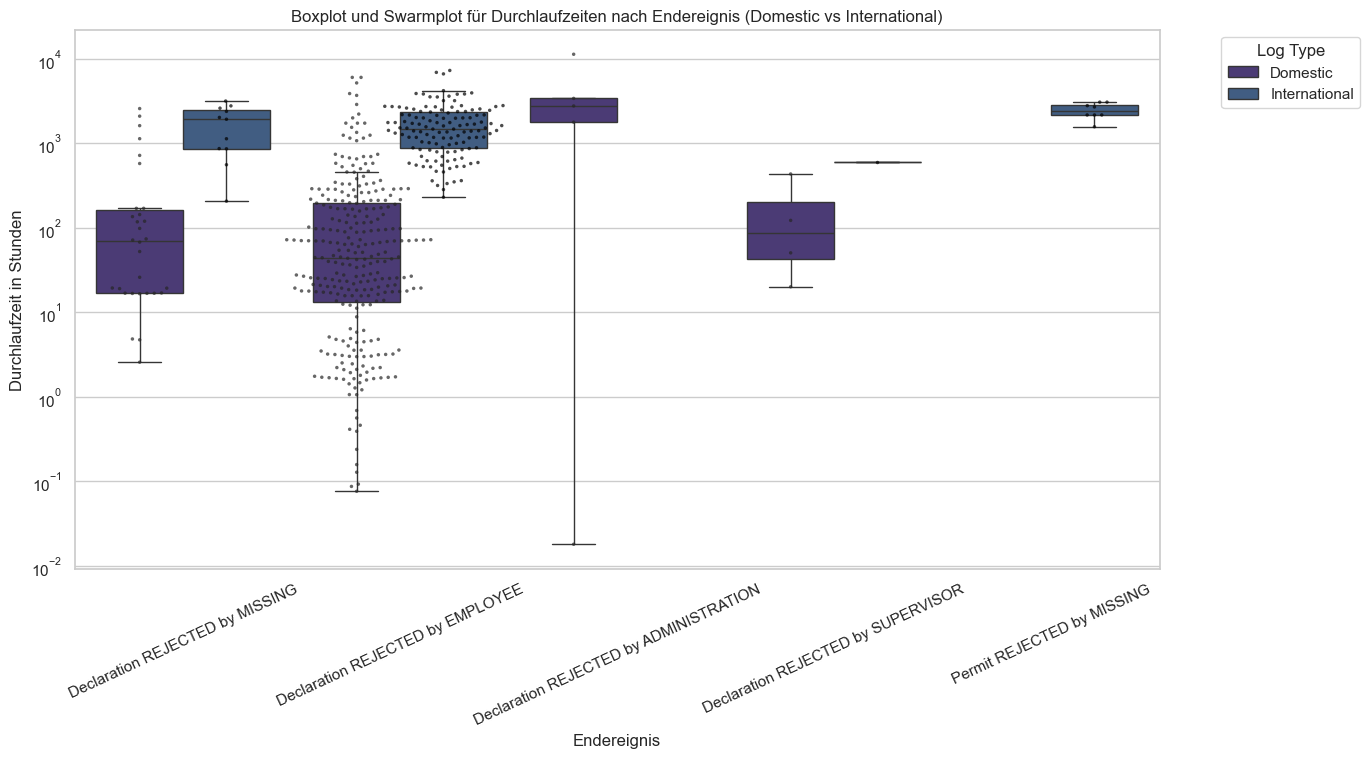

<Figure size 2000x1000 with 0 Axes>

- Die durchschnittlichen Durchlaufzeiten unterscheiden sich deutlich nach den Endaktivitäten
- Die häufigste Endaktivität ist in beiden untersuchten Logs ist _Declaration REJECTED by EMPLOYEE
- Es in Bezug auf die Durchlaufzeiten der Traces deutliche Ausreißer, insbesondere bei den beiden folgenden End-Events:
   - Declaration REJECTED by MISSING
   - Declaration REJECTED by EMPLOYEE


In [15]:
import matplotlib.pyplot as plt
import warnings
# Warnungen unterdrücken, um den Output übersichtlich zu halten:
warnings.filterwarnings("ignore") #, category=FutureWarning)

# Plot the boxplot and swarmplot using seaborn
plt.figure(figsize=(14, 7))
sns.boxplot(
    x='End Activity', 
    y='Duration', 
    hue='Log Type', 
    data=df_combined, 
    showfliers=False
    )

# Plot the swarmplot with black markers
sns.swarmplot(
    x='End Activity', 
    y='Duration', 
    hue='Log Type', 
    data=df_combined, 
    dodge=True, 
    marker='.', 
    alpha=0.7, 
    color='black'
    )

# Scale the y-axis logarithmically
plt.yscale('log')

# Customize the plot
plt.title('Boxplot und Swarmplot für Durchlaufzeiten nach Endereignis (Domestic vs International)')
plt.xlabel('Endereignis')
plt.ylabel('Durchlaufzeit in Stunden')
plt.xticks(rotation=25)  # Rotate x labels for better readability

# Warnungen unterdrücken, um den Output übersichtlich zu halten:
warnings.filterwarnings("ignore", category=FutureWarning)

# Remove the swarmplot legend by getting the handles and labels
handles, labels = plt.gca().get_legend_handles_labels()
# Keep only the first two handles (for boxplot) and their labels
plt.legend(
    handles[:2], 
    labels[:2], 
    title='Log Type', 
    bbox_to_anchor=(1.05, 1), 
    loc='upper left'
    )

# Speichern der Grafik als SVG-Datei
# output_path = "./Data/box_swarmplot_troughputtimes_endevent.svg"
# plt.savefig(output_path, format='svg')

plt.savefig("./Data/box_swarmplot_troughputtimes_endevent.svg", format='svg')
plt.figure(figsize=(20, 10))  # Set a larger figure size



# Show the plot
plt.show()

print(f'- Die durchschnittlichen Durchlaufzeiten unterscheiden sich deutlich nach den Endaktivitäten\n'
      '- Die häufigste Endaktivität ist in beiden untersuchten Logs ist _Declaration REJECTED by EMPLOYEE\n'
      '- Es in Bezug auf die Durchlaufzeiten der Traces deutliche Ausreißer, insbesondere bei den beiden folgenden End-Events:\n'
        '   - Declaration REJECTED by MISSING\n'
        '   - Declaration REJECTED by EMPLOYEE'
      )